<a href="https://colab.research.google.com/github/Lucas-Salomao/ia-generativa-chatgpt/blob/main/Consumo_de_Cerveja_em_S%C3%A3o_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consumo de cerveja em São Paulo

A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde happy hour até grandes festas de casamento. Se você pensar bem, já está com vontade de tomar uma cerveja, você não está sozinho.

A verdade é que ao redor do mundo milhares de pessoas consomem a bebida regularmente e também em diversas situações. Mas você já parou para pensar quais são os países que mais consomem cerveja no mundo? O primeiro que lhe veio à cabeça foi a Alemanha? Pois bem, saiba que não é assim.

A resposta a esta pergunta é contundente: a República Checa. De acordo com pesquisa da empresa japonesa de bebidas Kirin, o país liderou a tabela de consumo per capita de cerveja por 23 anos consecutivos.

Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os checos beberam 142,4 litros por pessoa. Isso equivale a 250 litros – ou um a cada 35 horas. Mas, dado que é pouco provável que os menores contribuam para esse número, é seguro assumir que o bebedor médio de cerveja provavelmente bebe um pouco mais.

Atrás dos calcanhares da República Checa estão os pretendentes habituais. A Áustria e a Alemanha aparecem em terceiro e quarto lugar, a Polónia em sexto e a Irlanda em sétimo. Há, no entanto, algumas surpresas. Em segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de turistas.

Os dados (amostra) foram coletados em São Paulo — Brasil, em uma área universitária, onde existem algumas festas com grupos de estudantes de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Target, com período de um ano.

https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo/data


1. Importação de bibliotecas.

Essas bibliotecas são necessárias para trabalhar com dados, realizar cálculos matemáticos e gerar gráficos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Importação dos dados

Esse comando irá importar o dataset para uma variável chamada dados

In [36]:
dados = pd.read_csv("Consumo_cerveja.csv")
dados

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Análise Preliminar

Esses comandos irão mostrar os primeiros registros do dataset, um resumo estatístico das variáveis, e informações sobre o tipo de dados de cada variável.

In [37]:
dados.head()
dados.describe()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


4. Limpeza dos dados

Primeiramenta vamos eliminar as linhas inválidas ou vazias.

In [38]:
dados = dados.dropna()
dados.head()
dados.describe()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


5. Normalização

Observamos que as primeiras colunas são identificadas como objeto. Esse erro se dá ao fato da separação decimal ser a vírgula e não o ponto. O mesmo fato ocorre para as duas ultimas colunas, que foram reconhecidas de maneira errada. O código a seguir corrige esse problema.

In [39]:
#dados["Temperatura Media (C)"] = dados["Temperatura Media (C)"].astype(float)
#dados["Temperatura Minima (C)"] = dados["Temperatura Minima (C)"].astype(float)
#dados["Temperatura Maxima (C)"] = dados["Temperatura Maxima (C)"].astype(float)
#dados["Precipitacao (mm)"] = dados["Precipitacao (mm)"].astype(float)

def format_comma_to_point(dataset, column):
    treated_data = []
    for data in dataset[column]:
        if data != np.nan:
            data = str(data).replace(",", ".")
            data = float(data)
        treated_data.append(data)
    dataset[column] = treated_data

format_comma_to_point(dados, "Temperatura Media (C)")
format_comma_to_point(dados, "Temperatura Minima (C)")
format_comma_to_point(dados, "Temperatura Maxima (C)")
format_comma_to_point(dados, "Precipitacao (mm)")

dados.head()
dados.describe()
dados.info()

dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


<ipython-input-39-85c84dcdf4b1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = treated_data


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


5. Análise Gráfica

Você também pode usar gráficos para visualizar os dados. Por exemplo, você pode usar o seguinte comando para criar um gráfico de dispersão da relação entre o consumo de cerveja e a temperatura média:

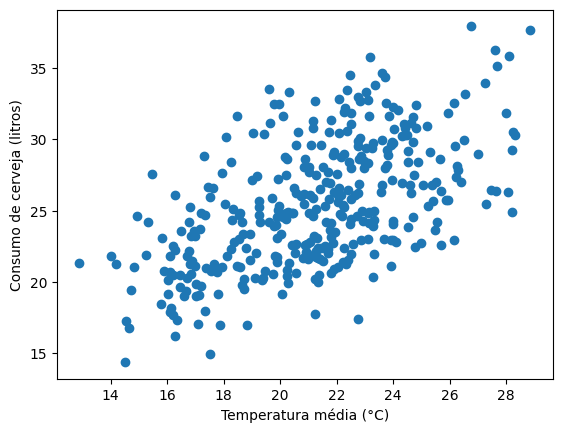

In [40]:
plt.scatter(dados["Temperatura Media (C)"], dados["Consumo de cerveja (litros)"])
plt.xlabel("Temperatura média (°C)")
plt.ylabel("Consumo de cerveja (litros)")
plt.show()


#scktlearn

Vamos ver a correlação entre as colunas

<ipython-input-41-caf53bac22b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dados.corr()


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


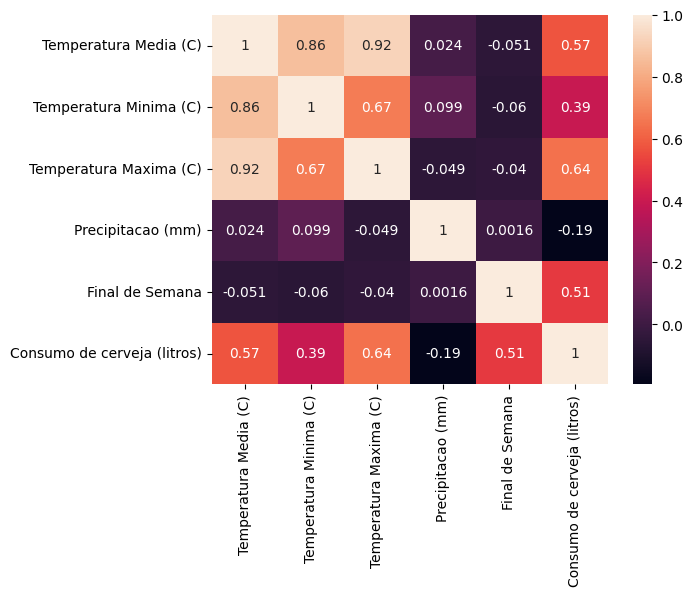

In [41]:
import seaborn as sns

correlation = dados.corr()
sns.heatmap(correlation, annot = True)

dados.corr(numeric_only = True)

Verificação de outliers

Text(0.5, 0, 'Dias')

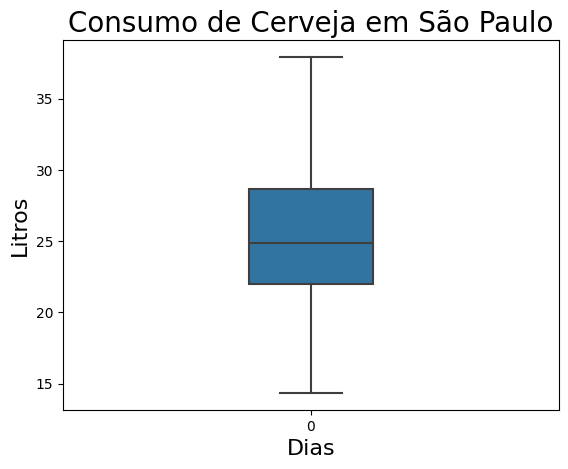

In [42]:
import seaborn as sns

ax = sns.boxplot(data = dados["Consumo de cerveja (litros)"], width = 0.25)
ax.set_title("Consumo de Cerveja em São Paulo", fontsize = 20)
ax.set_ylabel("Litros", fontsize = 16)
ax.set_xlabel("Dias", fontsize = 16)

Consumo de Cerveja na Semana

In [50]:
dados["Data"] = pd.to_datetime(dados["Data"])

dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 30.9 KB


<ipython-input-50-b16361856aa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Data"] = pd.to_datetime(dados["Data"])


In [53]:
dados["Dia da Semana"] = dados["Data"].dt.day_name()
dados["Mes"] = dados["Data"].dt.month_name()
dados

<ipython-input-53-09f38d7d6b1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Dia da Semana"] = dados["Data"].dt.day_name()
<ipython-input-53-09f38d7d6b1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Mes"] = dados["Data"].dt.month_name()


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana,Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,January
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,January
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,January
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,January
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,January
...,...,...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307,Sunday,December
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,Monday,December
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309,Tuesday,December
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467,Wednesday,December


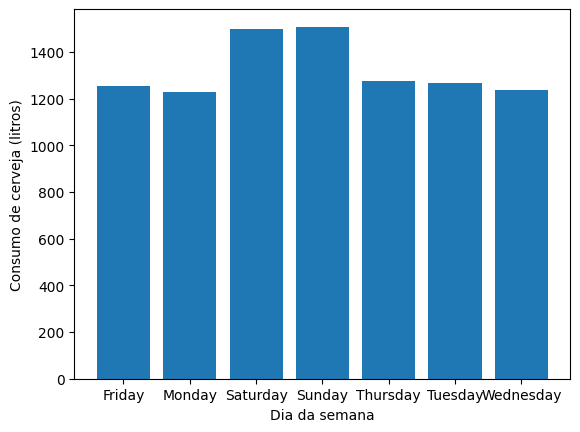

In [55]:
# Obtém o consumo de cerveja por dia da semana
consumo_por_dia_semana = dados.groupby("Dia da Semana")["Consumo de cerveja (litros)"].sum()

# Cria o gráfico
plt.bar(consumo_por_dia_semana.index, consumo_por_dia_semana.values)
plt.xlabel("Dia da semana")
plt.ylabel("Consumo de cerveja (litros)")
plt.show()

6. Separação da base para treinamento e avaliação

In [70]:
from sklearn.model_selection import train_test_split

# Separa os dados em treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    dados[["Temperatura Media (C)", "Temperatura Minima (C)", "Temperatura Maxima (C)", "Precipitacao (mm)", "Final de Semana"]],
    dados["Consumo de cerveja (litros)"],
    test_size=0.2,
    random_state=42,
)

7. Criando o modelo e treinando

In [71]:
from sklearn.linear_model import LinearRegression
# Cria o modelo de regressão
modelo = LinearRegression()

# Treina o modelo
modelo.fit(X_treinamento, y_treinamento)

LinearRegression()

8. Avaliação do Modelo

MSE: 5.699451793236824
MAE: 2.0564086260859002
R²: 0.7521188229128006


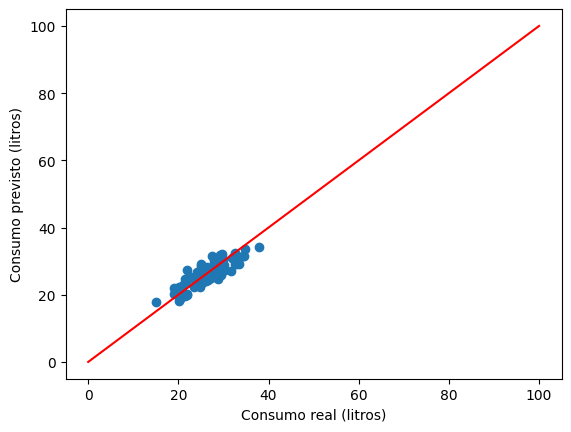

In [75]:
# Faz previsões
y_previsto = modelo.predict(X_teste)

# Calcula as medidas de avaliação
mse = np.mean((y_teste - y_previsto)**2)
mae = np.mean(abs(y_teste - y_previsto))
y_média = dados["Consumo de cerveja (litros)"].mean()
r2 = 1 - np.mean((y_teste - y_previsto)**2) / np.mean((y_teste - y_média)**2)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

# Plota as previsões do modelo
plt.scatter(y_teste, y_previsto)

# Adiciona uma linha de referência
plt.plot([0, 100], [0, 100], 'r-')

# Define os rótulos dos eixos
plt.xlabel("Consumo real (litros)")
plt.ylabel("Consumo previsto (litros)")

# Mostra o gráfico
plt.show()

9. Faz previsões usando o modelo

In [79]:
# Faz uma previsão
consumo_previsto = modelo.predict([[25.3, 15.1, 35.2, 15.0, 0.0]])
print(consumo_previsto)

[29.46155017]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
